# Project: Clean And Analyze Employee Exit Surveys


In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia in order to answer the following questions:

 * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 
 * Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 

Below is a preview of a couple columns we'll work with from the [**dete_survey.csv**](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey):

- `ID`: An id used to identify the participant of the survey
- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the [**tafe_survey.csv**](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey):

- `Record ID`: An id used to identify the participant of the survey
- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

**PS**: Both datasets are encoded in `'cp1252'`.

### Workflow:
We will go through these main setps:

- The dete_survey Data Exploration.
- The tafe_survey Data Exploration. 
- Combine the relevant data.
- Analyse the resulting data.

## Reading datasets

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# reading datasets
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv',encoding='cp1252')
tafe_survey = pd.read_csv('tafe-employee-exit-survey-access-database-december-2013.csv',encoding='cp1252')

## 'dete_survey' Data Exploration

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
# checking for duplicates
print('Number of duplicate rows:',dete_survey[dete_survey.duplicated()==True].shape[0])

Number of duplicate rows: 0


### Renaming columns 
To improve readability we will rename columns basing on the python naming Convention (using lowercase words and separate words with '_').


In [4]:
dete_survey.columns = dete_survey.columns.str.lower().str.replace(' ','_')
# check name change
dete_survey.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'inform

We start to investigate the columns of type object. 

In [5]:
# return columns of type object
dete_survey.select_dtypes('object').columns

Index(['separationtype', 'cease_date', 'dete_start_date', 'role_start_date',
       'position', 'classification', 'region', 'business_unit',
       'employment_status', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'information',
       'kept_informed', 'wellness_programs', 'health_&_safety', 'gender',
       'age', 'aboriginal', 'torres_strait', 'south_sea', 'disability',
       'nesb'],
      dtype='object')

In [6]:
# inspecting unique values in object columns
obj_cols = dete_survey.select_dtypes('object').columns
for i in obj_cols:
    print('Unique values in column "{}" :\n{}\n'.format(i,dete_survey[i].value_counts(dropna=False).sort_index()))

Unique values in column "separationtype" :
Age Retirement                          285
Contract Expired                         34
Ill Health Retirement                    61
Other                                    49
Resignation-Move overseas/interstate     70
Resignation-Other employer               91
Resignation-Other reasons               150
Termination                              15
Voluntary Early Retirement (VER)         67
Name: separationtype, dtype: int64

Unique values in column "cease_date" :
01/2014        43
02/2014         2
04/2013         2
04/2014         2
05/2012         6
05/2013         7
06/2013        27
07/2006         1
07/2012         1
07/2013        22
07/2014         2
08/2012         2
08/2013        12
09/2010         1
09/2013        34
09/2014         1
10/2013        20
11/2012         1
11/2013        16
12/2013        40
2010            1
2012          344
2013          200
2014            1
Not Stated     34
Name: cease_date, dtype: int64

Uniq

### Data Quality notes:

     
* The `'cease_date'` shows some dates in couple format (month/year) rather than just year.

* The `'role_start_date'` contains an odd date 200. 

* The columns `'cease_date'`,`'dete_start_date'`,`'role_start_date'` and `'region'` contain `'Not Stated'` values that indicate values are missing.

* `'business_unit'`,`'aboriginal'`,`'torres_strait'`,`'south_sea'`,`'disability'`,`'nesb'` contain more than 70% of missing values.

* A data dictionary wasn't provided with the dataset hence we cant confirm the definitions of some data such as `'skills'` and `'coach'`, moreover their unique values are incomprehensible `'A' 'D' 'M' 'N' 'SA' 'SD'`.



### Data cleaning

We will now resolve all of the issues that we have reported above by:

* Replacing `'Not Stated'` with `'None'`  in the columns `'cease_date'`,`'dete_start_date'`,`'role_start_date'` and `'region'`.
* Extracting the year from `'cease_date'`.
* Replacing the year `'200'` with `'2000'` in `'role_start_date'`.
* Dropping the irrelevant data: 
 - `'business_unit'`,`'aboriginal'`,`'torres_strait'`,`'south_sea'`,`'disability'`,`'nesb'` ,`'professional_development'`,
       `'opportunities_for_promotion'`, `'staff_morale'`, `'workplace_issue'`,
       `'physical_environment'`, `'worklife_balance'`,
       `'stress_and_pressure_support'`, `'performance_of_supervisor'`,
       `'peer_support'`, `'initiative'`, `'skills'`, `'coach'`, `'career_aspirations'`,
       `'feedback'`, `'further_pd'`, `'communication'`, `'my_say'`, `'information'`,
       `'kept_informed'`, `'wellness_programs'`, `'health_&_safety'`.

### Replacing 'Not Stated' with 'None'

In [7]:
for col in ['cease_date','dete_start_date','role_start_date' , 'region']:
    dete_survey.loc[dete_survey[col]=='Not Stated',col]=np.nan

### Cleaning 'cease_date'

Knowing the years of service that the employee has spent in the institute before exit is essential to be able to answer the first question and leading further analysis, unfortunately the dataset does not contain any, but we can use the `'cease_date'` and `'dete_start_date'` to resolve the problem. Below we will clean `'cease_date'` then we subtract the `'dete_start_date'` from the `'cease_date'` and assign the result to a new column named `'institute_service'`.

In [8]:
# extract years from cease_date and change type to float to support arithemtic opperations
dete_survey['cease_date'] = dete_survey['cease_date'].str.split('/').str[-1].astype(float)
# change type to float for dete_start_date substruct it from  years of cease_date and assign'institute_service'
dete_survey['institute_service'] = dete_survey['cease_date']-dete_survey['dete_start_date'].astype(float)

### Cleaning 'role_start_date'

In [9]:
dete_survey.loc[dete_survey['role_start_date']=='200','role_start_date']='2000'

### Removing unnecessary columns

In [10]:
unwanted_cols = ['business_unit','aboriginal','torres_strait','south_sea','disability','nesb' ,
                 'professional_development', 'opportunities_for_promotion', 'staff_morale', 
                 'workplace_issue', 'physical_environment', 'worklife_balance', 'stress_and_pressure_support', 
                 'performance_of_supervisor', 'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
                 'feedback', 'further_pd', 'communication', 'my_say', 'information', 'kept_informed', 'wellness_programs', 
                 'health_&_safety']

dete_survey.drop(unwanted_cols,axis=1,inplace=True)  # droping unwanted columns

In [11]:
# verifying dataset
print(dete_survey.info())
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 30 columns):
id                                     822 non-null int64
separationtype                         822 non-null object
cease_date                             788 non-null float64
dete_start_date                        749 non-null object
role_start_date                        724 non-null object
position                               817 non-null object
classification                         455 non-null object
region                                 717 non-null object
employment_status                      817 non-null object
career_move_to_public_sector           822 non-null bool
career_move_to_private_sector          822 non-null bool
interpersonal_conflicts                822 non-null bool
job_dissatisfaction                    822 non-null bool
dissatisfaction_with_the_department    822 non-null bool
physical_work_environment              822 non-null bool
lack_of_recognition   

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,employment_status,career_move_to_public_sector,...,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,institute_service
0,1,Ill Health Retirement,2012.0,1984,2004,Public Servant,A01-A04,Central Office,Permanent Full-time,True,...,False,False,False,False,False,False,True,Male,56-60,28.0
1,2,Voluntary Early Retirement (VER),2012.0,NaN,NaN,Public Servant,AO5-AO7,Central Office,Permanent Full-time,False,...,False,False,False,False,False,False,False,Male,56-60,NaN
2,3,Voluntary Early Retirement (VER),2012.0,2011,2011,Schools Officer,NaN,Central Office,Permanent Full-time,False,...,False,False,False,False,False,False,True,Male,61 or older,1.0
3,4,Resignation-Other reasons,2012.0,2005,2006,Teacher,Primary,Central Queensland,Permanent Full-time,False,...,False,False,False,False,False,False,False,Female,36-40,7.0
4,5,Age Retirement,2012.0,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,Permanent Full-time,False,...,False,False,False,False,True,False,False,Female,61 or older,42.0


### What are the leading reasons cited by employees for exit ?
Grouping data by `'separationtype'` and calculating the percentage of each group allows us to get the leading reasons cited by employees for exit.

In [12]:
# grouping data by seperationtype and sort values
seperationtype = dete_survey.groupby('separationtype')['id'].count().sort_values(ascending=True)
seperationtype

separationtype
Termination                              15
Contract Expired                         34
Other                                    49
Ill Health Retirement                    61
Voluntary Early Retirement (VER)         67
Resignation-Move overseas/interstate     70
Resignation-Other employer               91
Resignation-Other reasons               150
Age Retirement                          285
Name: id, dtype: int64

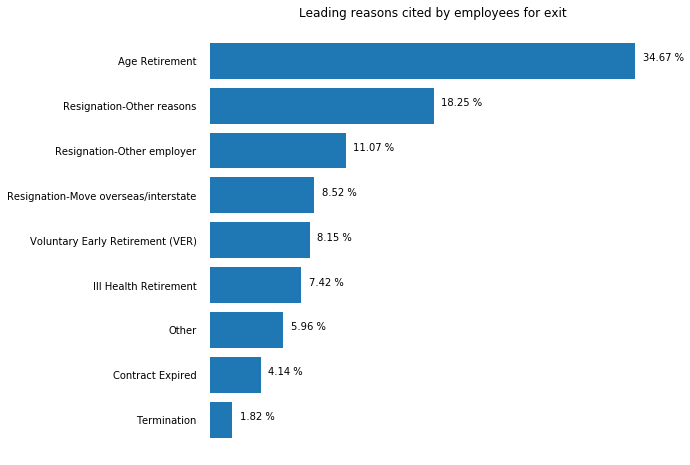

In [13]:
# plotting the percentage of each type
fig,ax1=plt.subplots(figsize=(8,8))
ax1.barh(seperationtype.index,seperationtype.values)
ax1.set_xticks([])
# remove spines
for key,spine in ax1.spines.items():
    spine.set_visible(False)    
ax1.set_title('Leading reasons cited by employees for exit',size=12)
# Remove y Ticks
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')
# add padding between axes and labels
ax1.xaxis.set_tick_params(pad=5)
ax1.yaxis.set_tick_params(pad=10)
# annotation
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_width()+5, i.get_y()+i.get_height()/2,\
             str(round(i.get_width()*100/seperationtype.values.sum(), 2))+' %', fontsize=10)

* 34.67% of the employees left the institute for age retirement while 18.5% of the employees resigned for another reason.

### What drives an employee to resign from the institute?
We are going first to select only the data for survey respondents who have a `'Resignation-Other reasons'` separation type then unpivot columns that define the contributing factors for resignation using the `pd.melt()` function, grouping data by the resulting column and applying the aggregation function `np.mean` on each group hence we will get the percentage of each reason for resignation.

In [14]:
contributing_factors = ['career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above']

# select 'Resignation-Other reasons' separation type
resignation = dete_survey.loc[dete_survey['separationtype'] == 'Resignation-Other reasons',:]
# unpivot contributing_factors in resignation
melted = pd.melt(resignation, value_vars=contributing_factors,var_name='Contributing factors')
# grouping by Contributing factors
resignation_reasons = melted.pivot_table(index='Contributing factors',values='value').sort_values('value')

In [15]:
resignation_reasons

,value
Contributing factors,
lack_of_job_security,0.020000
career_move_to_public_sector,0.026667
physical_work_environment,0.026667
study/travel,0.060000
traumatic_incident,0.066667
employment_conditions,0.073333
work_location,0.073333
interpersonal_conflicts,0.080000
career_move_to_private_sector,0.093333


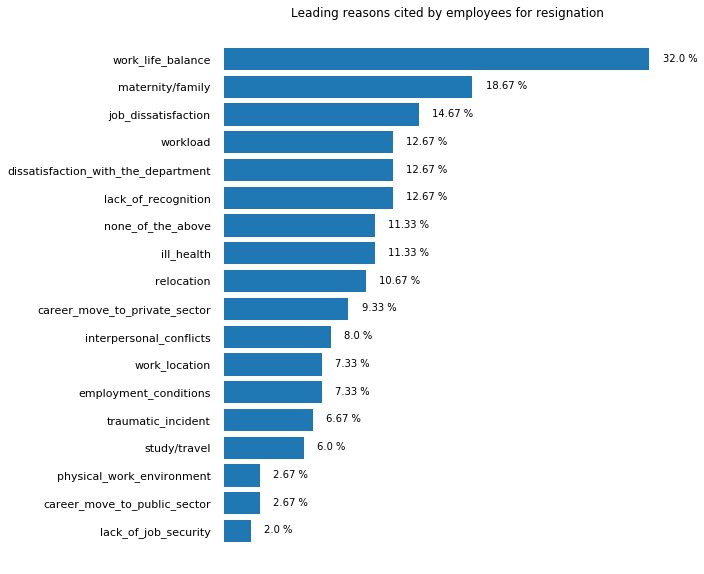

In [16]:
# plotting reason
fig,ax1=plt.subplots(figsize=(8,10))
ax1.barh(resignation_reasons.index,resignation_reasons.iloc[:,0])
ax1.set_xticks([])
for key,spine in ax1.spines.items():
    spine.set_visible(False)
    
ax1.set_title('Leading reasons cited by employees for resignation',size=12)
# Remove y Ticks
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')

# Add padding between axes and labels
ax1.xaxis.set_tick_params(pad=5)
ax1.yaxis.set_tick_params(pad=10,labelsize=11)
# annotation
for i in ax1.patches:
    ax1.text(i.get_width()+.01, i.get_y()+i.get_height()/2 -.09,\
             str(round(i.get_width()*100, 2))+' %', fontsize=10)

* Employees who could not find the right work-life balance are more likely to resign at some point of their career.

Recall that our end goal is to answer questions relating to resigned employees due to some kind of dissatisfaction. if we look at the unique values in the `'separationtype'`, we'll see that the column contains a couple of different separation types. in our case we are interested in types that contains the string `'Resignation'`.

In [17]:
# unique values of 'separationtype'
print('Counts of unique values in column:\n{}'.format(dete_survey.separationtype.value_counts(dropna=False)))

Counts of unique values in column:
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [18]:
# select only the data for survey respondents who have a Resignation separation type.
dete_resignation = dete_survey[dete_survey['separationtype'].str.contains('Resignation')].copy()

In [19]:
dete_resignation.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,employment_status,career_move_to_public_sector,...,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,institute_service
3,4,Resignation-Other reasons,2012.0,2005,2006,Teacher,Primary,Central Queensland,Permanent Full-time,False,...,False,False,False,False,False,False,False,Female,36-40,7.0
5,6,Resignation-Other reasons,2012.0,1994,1997,Guidance Officer,NaN,Central Office,Permanent Full-time,False,...,False,False,False,False,False,False,False,Female,41-45,18.0
8,9,Resignation-Other reasons,2012.0,2009,2009,Teacher,Secondary,North Queensland,Permanent Full-time,False,...,False,False,False,False,False,False,False,Female,31-35,3.0
9,10,Resignation-Other employer,2012.0,1997,2008,Teacher Aide,NaN,NaN,Permanent Part-time,False,...,False,False,False,False,False,False,False,Female,46-50,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009,2009,Teacher,Secondary,Far North Queensland,Permanent Full-time,False,...,True,False,False,False,False,False,False,Male,31-35,3.0


Now we have to identify any employees who resigned because of dissatisfaction.

Below are the columns we'll use to categorize employees as "dissatisfied" from the dataframe `'dete_survey'`.

* `'job_dissatisfaction'`
* `'dissatisfaction_with_the_department'`
* `'physical_work_environment'`
* `'lack_of_recognition'`
* `'lack_of_job_security'`
* `'work_location'`
* `'employment_conditions'`
* `'work_life_balance'`
* `'workload'`

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [20]:
# creating a new column 'dissatisfied' to refer to any employee has resign for one of the following reasons using the any() method:
reasons = ['interpersonal_conflicts',
'job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'employment_conditions',
'traumatic_incident',
'workload']
dete_resignation['dissatisfied']=dete_resignation[reasons].any(axis=1,skipna=False)

Now let's select the relevant columns that fit under the context of the problem we're trying to solve.

In [21]:
dete_resignation_updated = dete_resignation[['age','institute_service','dissatisfied']].copy()

In [22]:
# verify data
print(dete_resignation_updated.info())
dete_resignation_updated.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 3 columns):
age                  306 non-null object
institute_service    273 non-null float64
dissatisfied         311 non-null bool
dtypes: bool(1), float64(1), object(1)
memory usage: 7.6+ KB
None


,age,institute_service,dissatisfied
3,36-40,7.0,False
5,41-45,18.0,True
8,31-35,3.0,False
9,46-50,15.0,True
11,31-35,3.0,False


## 'tafe_survey' Data Exploration 

In [23]:
# checking for duplicates
tafe_survey[tafe_survey.duplicated()==True].shape[0]

0

In [24]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [25]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor.     Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate 

`dete_survey` and `tafe_survey` contain many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names.

### Renaming columns

In [26]:
standardize_cols = {'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
                    'Gender. \xa0\xa0\xa0\xa0What is your Gender?': 'gender',
                    'CurrentAge. \xa0\xa0\xa0\xa0Current Age': 'age',
                    'Employment Type. \xa0\xa0\xa0\xa0Employment Type': 'employment_status',
                    'Classification. Classification': 'position',
                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
                    'Classification. \xa0\xa0\xa0\xa0Classification':'position'}

tafe_survey.rename(standardize_cols,inplace=True,axis=1) 


In [27]:
# verify name change
tafe_survey.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,gender,age,employment_status,position,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Cleaning 'Contributing Factors' columns
As we see above columns that their names contain `'Contributing Factors'` show `'-'` values, we have to update those columns so   that each contains only True, False, or NaN values.

In [28]:
# check the unique values of 'Contributing Factors. Career Move - Public Sector '
tafe_survey['Contributing Factors. Career Move - Public Sector '].value_counts(dropna = False)

-                              375
NaN                            265
Career Move - Public Sector     62
Name: Contributing Factors. Career Move - Public Sector , dtype: int64

In [29]:
# ctreate a function named update_vals that makes the following changes:
# If the value is NaN, return np.nan. 
# If the value is '-', return False.
# For any other value, return True

def update_val(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True
    
# updating values  for columns:   
cols = ['Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE']

tafe_survey[cols] = tafe_survey[cols].applymap(update_val)


### Cleaning 'separationtype'

In [30]:
# check for the different types of separation in tafe_survey 
tafe_survey['separationtype'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

The `'separationtype'` column contain one `'Nan'` value that we are going to handle by replacing it with the most frequent element of the concerned column wich is `'Resignation'`.

In [31]:
# filling the null value in 'separationtype' with 'Resignation'
tafe_survey['separationtype'] = tafe_survey['separationtype'].fillna('Resignation')

### What are the leading reasons cited by employees for exit ?
Grouping data by `'separationtype'` and calculating the percentage of each group allows us to get the leading reasons cited by employees for exit.

In [32]:
# grouping data by 'separationtype'
seperationtype = tafe_survey.groupby('separationtype')['id'].count().sort_values(ascending=True)
seperationtype

separationtype
Termination                  23
Transfer                     25
Retirement                   82
Retrenchment/ Redundancy    104
Contract Expired            127
Resignation                 341
Name: id, dtype: int64

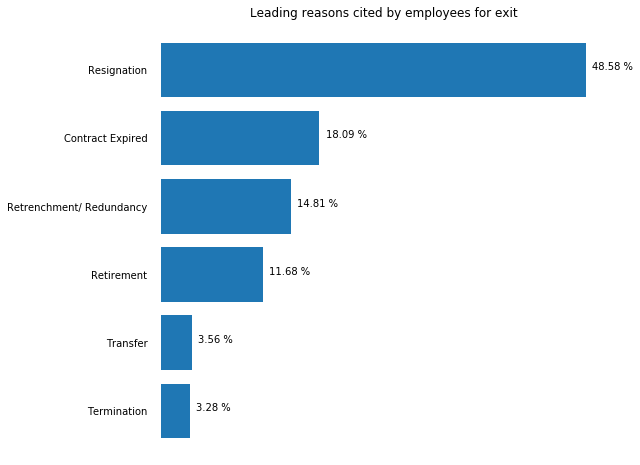

In [33]:
# plotting seperationtype
fig,ax1=plt.subplots(figsize=(8,8))
ax1.barh(seperationtype.index,seperationtype.values)
ax1.set_xticks([])
for key,spine in ax1.spines.items():
    spine.set_visible(False)
    
ax1.set_title('Leading reasons cited by employees for exit',size=12)
# Remove y Ticks
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')
# Add padding between axes and labels
ax1.xaxis.set_tick_params(pad=5)
ax1.yaxis.set_tick_params(pad=10)
# annotation
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_width()+5, i.get_y()+i.get_height()/2,\
             str(round(i.get_width()*100/seperationtype.values.sum(), 2))+' %', fontsize=10)

Between 2010 and 2013, almost 50 % of employees have resigned from the institute.

### What drives an employee to resign from the institute?
We are going first to select only the data for survey respondents who have a `'Resignation'` separation type then unpivot columns that define the contributing factors for resignation using the `pd.melt()` function, grouping data by the resulting column and applying the aggregation function `np.mean` on each group hence we will get the percentage of each reason for resignation.

In [34]:
# select data for 'Resingation' separtaiontype and assign it to 'tafe_survey_resignation'
tafe_survey_resignation = tafe_survey.loc[tafe_survey['separationtype'].str.contains('Resignation'),:].copy()
# select 'id' and columns that contain 'contributing factor' by position and assign to 'tafe_survey_resignation_factors'
tafe_survey_resignation_factors = tafe_survey_resignation.iloc[:,np.append(np.arange(5,17),0)].copy()

In [35]:
tafe_survey_resignation_factors.head()

,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,id
3,False,False,False,False,False,False,False,False,False,True,False,False,634139903350000000
4,False,True,False,False,False,False,False,False,False,False,False,False,634146578511788000
5,False,False,False,False,False,False,False,False,False,False,True,False,634147506906311000
6,False,True,False,False,True,False,False,False,False,False,True,False,634152007975694000
7,False,False,False,False,False,False,False,False,False,False,True,False,634153745310374000


The column `'Contributing Factors. None'` doesnt provide any valuable information, so we will drop it.

In [36]:
print(tafe_survey_resignation_factors['Contributing Factors. NONE'].value_counts(dropna = False))
tafe_survey_resignation_factors.drop('Contributing Factors. NONE',axis = 1,inplace = True)

False    316
True      16
NaN        9
Name: Contributing Factors. NONE, dtype: int64


In [37]:
tafe_survey_resignation_factors

,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,id
3,False,False,False,False,False,False,False,False,False,True,False,634139903350000000
4,False,True,False,False,False,False,False,False,False,False,False,634146578511788000
5,False,False,False,False,False,False,False,False,False,False,True,634147506906311000
6,False,True,False,False,True,False,False,False,False,False,True,634152007975694000
7,False,False,False,False,False,False,False,False,False,False,True,634153745310374000
...,...,...,...,...,...,...,...,...,...,...,...,...
696,False,True,False,False,False,False,False,False,False,False,False,635065973820625000
697,True,False,False,False,False,False,False,False,False,False,False,635066785175197000
698,True,False,False,False,False,False,False,False,False,False,False,635067716405666000
699,False,False,False,False,False,False,False,False,False,False,True,635070442972541000


In [38]:
# renaming columns in 'tafe_survey_resignation_factors' 
tafe_survey_resignation_factors.columns = tafe_survey_resignation_factors.columns.str.replace('Contributing Factors. ','')\
                                            .str.strip()\
                                            .str.replace(' - ',' to ')\
                                            .str.replace(' ','_')\
                                            .str.lower()
                                            

In [39]:
tafe_survey_resignation_factors

,career_move_to_public_sector,career_move_to_private_sector,career_move_to_self-employment,ill_health,maternity/family,dissatisfaction,job_dissatisfaction,interpersonal_conflict,study,travel,other,id
3,False,False,False,False,False,False,False,False,False,True,False,634139903350000000
4,False,True,False,False,False,False,False,False,False,False,False,634146578511788000
5,False,False,False,False,False,False,False,False,False,False,True,634147506906311000
6,False,True,False,False,True,False,False,False,False,False,True,634152007975694000
7,False,False,False,False,False,False,False,False,False,False,True,634153745310374000
...,...,...,...,...,...,...,...,...,...,...,...,...
696,False,True,False,False,False,False,False,False,False,False,False,635065973820625000
697,True,False,False,False,False,False,False,False,False,False,False,635066785175197000
698,True,False,False,False,False,False,False,False,False,False,False,635067716405666000
699,False,False,False,False,False,False,False,False,False,False,True,635070442972541000


In [40]:
# unpivot the following columns
cols_to_unpivot = ['career_move_to_public_sector', 'career_move_to_private_sector',
       'career_move_to_self-employment', 'ill_health', 'maternity/family',
       'dissatisfaction', 'job_dissatisfaction', 'interpersonal_conflict',
       'study', 'travel', 'other']
melted=pd.melt(tafe_survey_resignation_factors,value_vars=cols_to_unpivot,var_name='contributing_factor')
melted.head()

,contributing_factor,value
0,career_move_to_public_sector,False
1,career_move_to_public_sector,False
2,career_move_to_public_sector,False
3,career_move_to_public_sector,False
4,career_move_to_public_sector,False


In [41]:
melted.value.value_counts(dropna = False)

False    3191
True      461
NaN        99
Name: value, dtype: int64

In [42]:
# grouping melted by 'contributing_factor'
contributing_factor = melted.groupby('contributing_factor')['value'].sum().sort_values(ascending=True)
contributing_factor

contributing_factor
career_move_to_self-employment    13
study                             16
travel                            17
maternity/family                  20
ill_health                        21
interpersonal_conflict            24
career_move_to_public_sector      48
dissatisfaction                   55
job_dissatisfaction               62
other                             86
career_move_to_private_sector     99
Name: value, dtype: int64

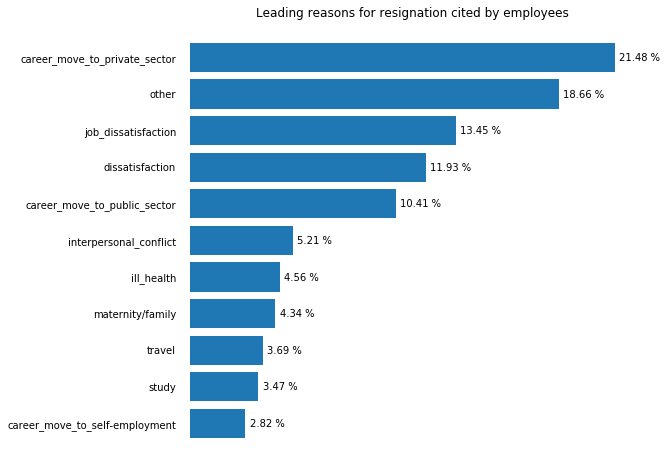

In [43]:
# plotting contributing_factor
fig,ax1=plt.subplots(figsize=(8,8))
ax1.barh(contributing_factor.index,contributing_factor.values)
ax1.set_xticks([])
# remove spined
for key,spine in ax1.spines.items():
    spine.set_visible(False)
# set title    
ax1.set_title('Leading reasons for resignation cited by employees',size=12)
# remove y Ticks
ax1.yaxis.set_ticks_position('none')
ax1.xaxis.set_ticks_position('none')
# Add padding between axes and labels
ax1.xaxis.set_tick_params(pad=5)
ax1.yaxis.set_tick_params(pad=10)
# annotation
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_width()+1, i.get_y()+i.get_height()/2 -.09,\
             str(round(i.get_width()*100/contributing_factor.values.sum(), 2))+' %', fontsize=10)

* 21.48% of the resigned employees intend to move their career to the private sector.
* Dissatisfaction drives for about 16 % of employees to resign.

### What is the point of view of the resigners due to dissatisfaction towards the institute in which they worked ?
We will use here the `'tafe_survey_resignation'` that we have created above that groups all the resignation separation type then we will use the columns `'Contributing Factors. Dissatisfaction'` and `'Contributing Factors. Job Dissatisfaction'` to categorize employees as `'dissatisfied'`, finally we will select all the columns that contain `'InstituteViews'` to explore them. 

In [44]:
# categorize employees as 'dissatisfied'
dissatisfaction_cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_survey_resignation['dissatisfied'] = tafe_survey_resignation[dissatisfaction_cols].any(axis=1,skipna=False)

In [45]:
# select employees who have resigned due to dissatisfaction and assign it to 'tafe_survey_resignation_dissatisfied'
tafe_survey_resignation_dissatisfied = tafe_survey_resignation[tafe_survey_resignation['dissatisfied'] == True].copy()
# select columns that contain 'InstituteViews' and assign it to tafe_survey_resignation_dissatisfied_InstituteViews
tafe_survey_resignation_dissatisfied_instituteviews = tafe_survey_resignation_dissatisfied.iloc[:,18:19+12].copy()
# removing 'InstituteViews.' from columns and keeping topics only
tafe_survey_resignation_dissatisfied_instituteviews.columns = tafe_survey_resignation_dissatisfied_instituteviews.columns.str.replace('InstituteViews.','').str.strip()
# replacing '%Institute]Q25LBL%' with 'institute' in topic 4 
tafe_survey_resignation_dissatisfied_instituteviews.rename(columns={'Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%':'Topic:4. I was given adequate opportunities for promotion within Institute'},inplace=True)
# veryfing resulting data
tafe_survey_resignation_dissatisfied_instituteviews

,Topic:1. I feel the senior leadership had a clear vision and direction,Topic:2. I was given access to skills training to help me do my job better,Topic:3. I was given adequate opportunities for personal development,Topic:4. I was given adequate opportunities for promotion within Institute,Topic:5. I felt the salary for the job was right for the responsibilities I had,Topic:6. The organisation recognised when staff did good work,Topic:7. Management was generally supportive of me,Topic:8. Management was generally supportive of my team,Topic:9. I was kept informed of the changes in the organisation which would affect me,Topic:10. Staff morale was positive within the Institute,Topic:11. If I had a workplace issue it was dealt with quickly,Topic:12. If I had a workplace issue it was dealt with efficiently,Topic:13. If I had a workplace issue it was dealt with discreetly
14,Neutral,Agree,Agree,Neutral,Agree,Neutral,Neutral,Disagree,Agree,Strongly Disagree,Disagree,Disagree,Agree
17,Agree,Agree,Neutral,Neutral,Disagree,Neutral,Agree,Agree,Agree,Strongly Disagree,Neutral,Neutral,Neutral
20,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Neutral,Agree,Not Applicable,Disagree,Disagree,Neutral,Neutral,Neutral
26,Strongly Disagree,Neutral,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Agree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree
40,Disagree,Disagree,Disagree,Disagree,Neutral,NaN,Disagree,NaN,NaN,NaN,Disagree,Disagree,Disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Agree,Neutral,Neutral,Strongly Disagree,Disagree,Neutral,Agree,Agree,Agree,Neutral,Agree,Agree,Agree
671,Neutral,Disagree,Disagree,Disagree,Disagree,Agree,Disagree,Neutral,Agree,Neutral,Disagree,Disagree,Neutral
675,Disagree,Strongly Disagree,Disagree,Not Applicable,Strongly Disagree,Neutral,Neutral,Neutral,Agree,Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree
685,Neutral,Neutral,Strongly Disagree,Strongly Disagree,Disagree,NaN,NaN,NaN,Neutral,NaN,Not Applicable,Not Applicable,Not Applicable


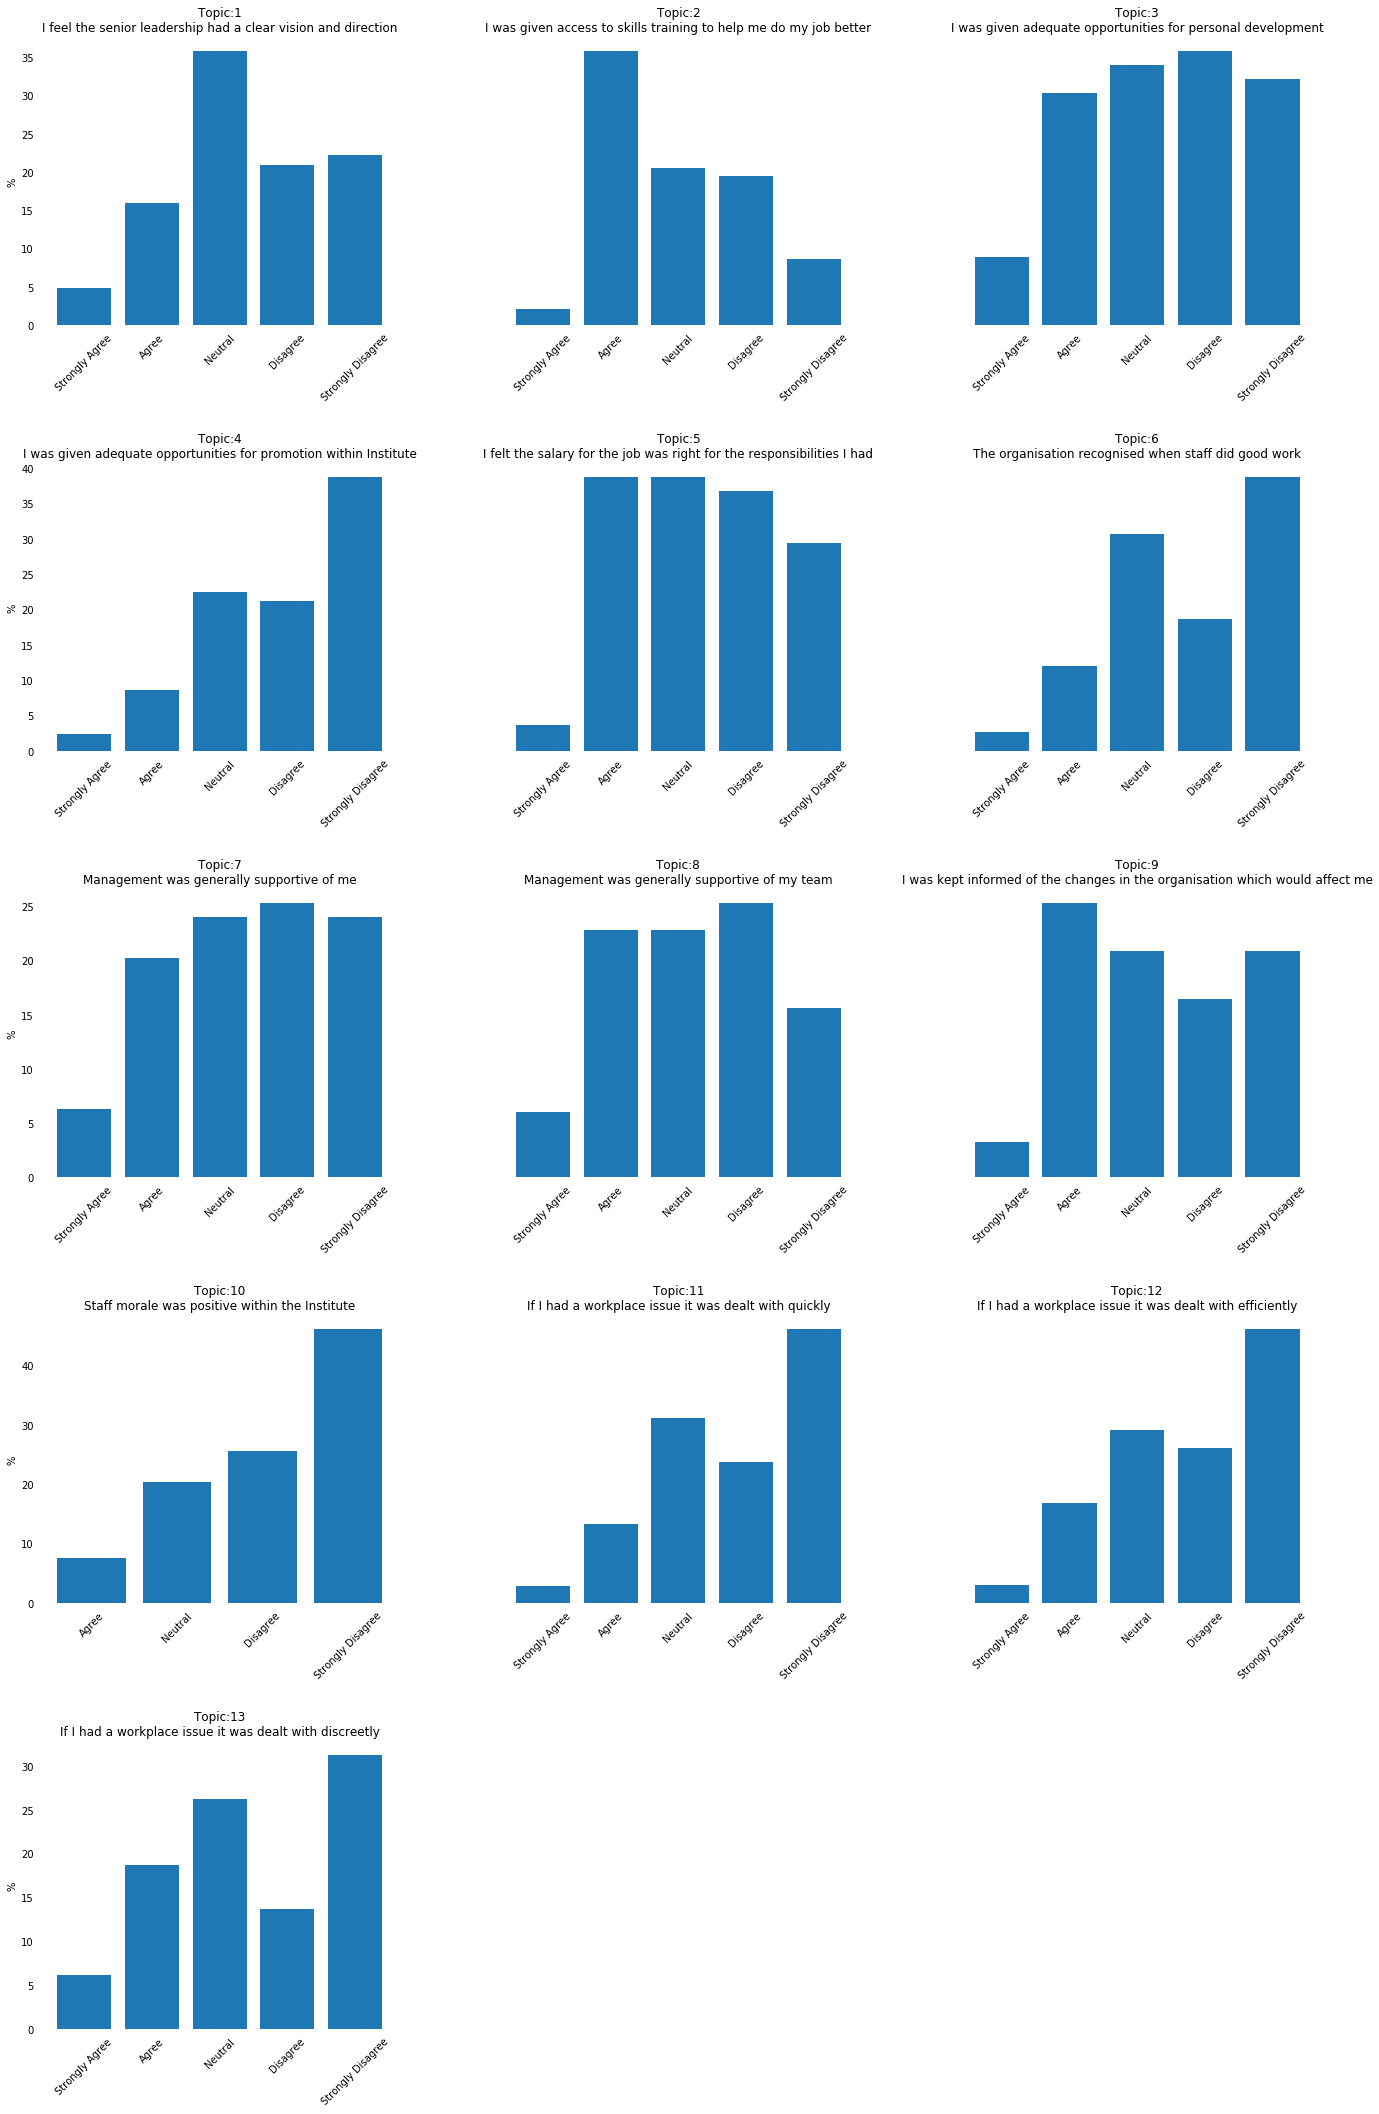

In [46]:
# plotting topics using bar plot 
columns = tafe_survey_resignation_dissatisfied_instituteviews.columns
fig=plt.figure(figsize=(20, 30))
new_index = ['Strongly Agree','Agree','Neutral','Disagree','Strongly Disagree']
for pos,val in enumerate(columns):
    topic = tafe_survey_resignation_dissatisfied_instituteviews[val].value_counts()
    topic_percentage = round(topic*100/topic.sum(),2)
    topic_percentage=topic_percentage.reindex(new_index) # reindex used to change the order of index
    ax=fig.add_subplot(5,3,pos+1)
    ax.bar(topic_percentage.index,topic_percentage)
    # split title into two lines
    title = val.split('.')
    ax.set_title('{}\n{}'.format(title[0],title[1].strip()))
    # remove y Ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    if pos+1 not in [1,4,7,10,13]:
        ax.set_yticks([])
    ax.tick_params(axis='x', rotation=45)
    
    if pos+1 in [1,4,7,10,13]:
        ax.set_ylabel('%')
    # remove spines
    for key,spine in ax.spines.items():
        spine.set_visible(False)  
        
fig.tight_layout(pad=3) 
plt.savefig("topics.png")     

Resigned employees liked the idea of being given access to training skills to do their job better but they were disagree about:
* The salary, they did not think that the salary was right to responsibilities of the job, which explains why the employees have resigned to change their career towards the private sector where they could get more money.
* The staff morale within the institute.
* The efficiency in dealing with workplace issue.



Below we are going to select the columns `['age','institute_service','dissatisfied']` from `'tafe_survey_resignation'` as we did with `'dete_survey'` to answer the following questions: 

 * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 
 * Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [47]:
tafe_resignation_updated = tafe_survey_resignation[['age','institute_service','dissatisfied']].copy()
print(tafe_resignation_updated.info())
tafe_resignation_updated.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 3 to 701
Data columns (total 3 columns):
age                  290 non-null object
institute_service    290 non-null object
dissatisfied         332 non-null object
dtypes: object(3)
memory usage: 10.7+ KB
None


,age,institute_service,dissatisfied
3,NaN,NaN,False
4,41 – 45,3-4,False
5,56 or older,7-10,False
6,20 or younger,3-4,False
7,46 – 50,3-4,False


## Combining 'dete_resignation_updated' and 'tafe_resignation_updated'
In this section we will combine the two datasets `dete_resignation_updated` and `tafe_resignation_updated`

In [48]:
# creating a new column for each dataframe so we could easily distinguish between the two:
dete_resignation_updated['institute'] = 'dete'
tafe_resignation_updated['institute'] = 'tafe'

In [49]:
# combine the two datasets
combined = pd.concat([dete_resignation_updated,tafe_resignation_updated],axis=0,ignore_index=True)
combined

,age,institute_service,dissatisfied,institute
0,36-40,7,False,dete
1,41-45,18,True,dete
2,31-35,3,False,dete
3,46-50,15,True,dete
4,31-35,3,False,dete
...,...,...,...,...
647,21 – 25,5-6,False,tafe
648,51-55,1-2,False,tafe
649,NaN,NaN,False,tafe
650,51-55,5-6,False,tafe


## 'combine' Data Cleaning

In [50]:
for i in combined.columns:
    print('Counts of unique values in column: "{}" :\n{}\n'.format(i,combined[i].value_counts(dropna=False)))

Counts of unique values in column: "age" :
51-55            71
NaN              56
41-45            48
41 – 45          45
46-50            42
36-40            41
46 – 50          39
26-30            35
21 – 25          33
26 – 30          32
36 – 40          32
31 – 35          32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Counts of unique values in column: "institute_service" :
NaN                   89
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0           

### Handling missing values
We will handle missing values by replacing them with the value that occurs most frequently in the concerned column.


In [51]:
# fill in missing values in dissatisfied with 'False'
combined.dissatisfied.fillna(False,inplace=True)
# fill in missing values in institute_service with 'Less than 1 year'
combined.institute_service.fillna('Less than 1 year',inplace=True)
# fill in missing values in age with '51-55'
combined.age.fillna('51-55',inplace=True)

The values in `'institute_service'` and the `'age'` columns need to be converted into categories to be able to analyze the data more easily.

We'll use the slightly modified definitions below for categorizing the `'institute_service'`:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

We'll organize the column `'age'` according to these definitions below which have been taken from this [article](https://www.cv-library.co.uk/recruitment-insight/engage-different-age-groups-your-workplace/):

* Baby boomers: aged 55+
* Gen X: aged 35-54 
* Millennials: aged 25-34
* Gen Z: aged 24-

###  Categorize 'age'

In [52]:
# mappig each value to one of the age category definitions below.
def age_cat(val):
    val =float(val)
    if pd.isnull(val): 
        return np.nan
    elif val >= 55:
        return 'Baby boomers'
    elif val >= 35 and val <= 54:
        return 'Gen X'
    elif val >= 25 and val <= 34:
        return 'Millennials'
    else:
        return 'Gen Z'
    
combined.age = combined.age.str[:2].apply(age_cat) # extracting the two first digits and applying the age_cat function 
print("Counts of unique values in 'age': \n",combined.age.value_counts(dropna=False))

Counts of unique values in 'age': 
 Gen X           374
Millennials     128
Baby boomers     78
Gen Z            72
Name: age, dtype: int64


### Categorize 'institute_service'

In [53]:
# mappig each value to one of the career stage definitions below.
def career_stage(val):
    val=float(val)
    if pd.isnull(val): 
        return np.nan
    elif val < 3:
        return 'New'
    elif val >= 3 and val <= 6: 
        return 'Experienced'
    elif val >=7 and val <= 10: 
        return 'Established'
    else: 
        return 'Veteran'
    
# extracting year:
pattern = r'([0-9]+)'
combined.institute_service = combined.institute_service.astype(str).str.extract(pattern)
# Applying the function on 'institute_service' 
combined['institute_service'] = combined['institute_service'].apply(career_stage)
print("Counts of unique values in institute service:\n",combined.institute_service.value_counts(dropna=False))

Counts of unique values in institute service:
 New            282
Experienced    172
Veteran        136
Established     62
Name: institute_service, dtype: int64


In [54]:
# verify combined
print(combined.info())
combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 4 columns):
age                  652 non-null object
institute_service    652 non-null object
dissatisfied         652 non-null bool
institute            652 non-null object
dtypes: bool(1), object(3)
memory usage: 16.0+ KB
None


,age,institute_service,dissatisfied,institute
0,Gen X,Established,False,dete
1,Gen X,Veteran,True,dete
2,Millennials,Experienced,False,dete
3,Gen X,Veteran,True,dete
4,Millennials,Experienced,False,dete


In [55]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 4 columns):
age                  652 non-null object
institute_service    652 non-null object
dissatisfied         652 non-null bool
institute            652 non-null object
dtypes: bool(1), object(3)
memory usage: 16.0+ KB


## 'combined' Data Analysis


### Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
We will aggregate the dissatisfied column in `'combined'` and calculate the percentage of people in each group using `pd.pivot_table()` then plotting the result.

In [56]:
# grouping data by 'institute_service'
grouped_inst = combined.pivot_table(index='institute_service',values='dissatisfied').sort_values('dissatisfied')
grouped_inst

,dissatisfied
institute_service,
New,0.262411
Experienced,0.290698
Veteran,0.397059
Established,0.403226


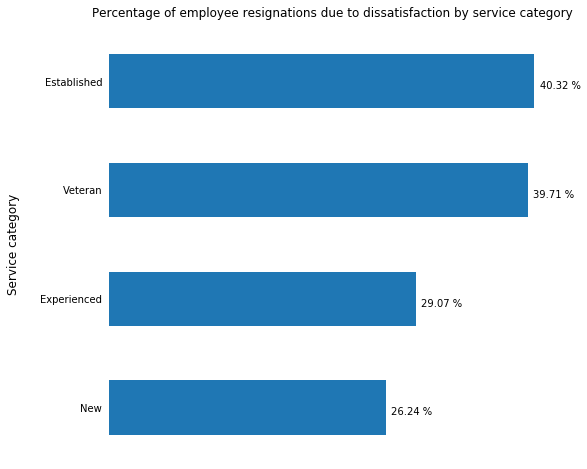

In [57]:
# ploting grouped_inst
plt.figure(figsize=(8,8))
ax1=plt.gca()
grouped_inst.dissatisfied.plot(kind='barh',legend=False,ax=ax1)
ax1.set_xticks([])
ax1.set_ylabel('Service category',labelpad=20,size=12)
ax1.set_title('Percentage of employee resignations due to dissatisfaction by service category',pad=10,size=12)
ax1.tick_params(right=False,top=False,left=False,bottom=False)

# remove spines
for key,spine in ax1.spines.items():
    spine.set_visible(False)

# annotation
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_width()+.005,i.get_y()+i.get_height()/2 -.07,\
             str(round(i.get_width()*100, 2))+' %')


- 40.32% of employees who worked for the institutes for a long period of time resigned due to some dissatisfaction.
- 126.24% of employees who worked for the institutes for a short period of time resigned due to some dissatisfaction.

### Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
We will aggregate the age column in `'combined'` and calculate the percentage of people in each group using `pd.pivot_table()` then plotting the result.

In [58]:
# grouping data by 'age'
grouped_age = combined.pivot_table(index='age',values='dissatisfied').sort_values('dissatisfied')
grouped_age

,dissatisfied
age,
Gen Z,0.263889
Millennials,0.304688
Gen X,0.310160
Baby boomers,0.371795


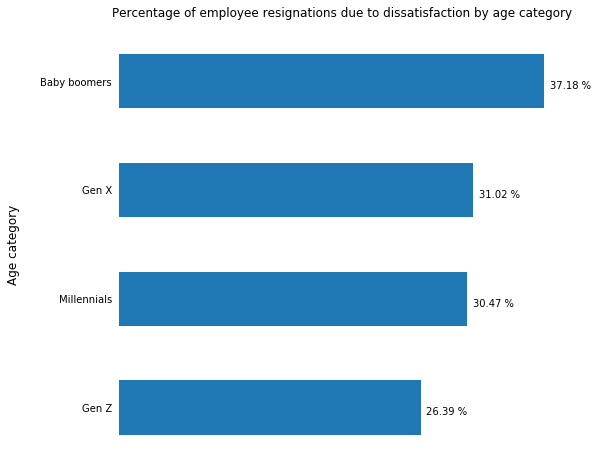

In [59]:
# ploting grouped_inst
plt.figure(figsize=(8,8))
ax1=plt.gca()
grouped_age.plot(kind='barh',legend=False,ax=ax1)
ax1.set_xticks([])
ax1.set_ylabel('Age category',labelpad=20,size=12)
ax1.set_title('Percentage of employee resignations due to dissatisfaction by age category',pad=10,size=12)
ax1.tick_params(right=False,top=False,left=False,bottom=False)

# remove spines
for key,spine in ax1.spines.items():
    spine.set_visible(False)

# annotation
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_width()+.005,i.get_y()+i.get_height()/2 -.07,\
             str(round(i.get_width()*100, 2))+' %')

- 37.18% of employees who resigned for dissatisfaction aged 55 and higher.
- 26.39% of employees who have resigned because of some dissatisfaction are young.

## Conclusion

In this project we have worked with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia in order to answer the following questions:

   * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 
   * Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We have found that younger employees with fewer years of experience are less likely to resign due to some sort of dissatisfaction than older employees with long years of experience.

Regarding the exit surveys of employees of the Ministry of Education, Training and Employment (DETE) institute in Queensland, Australia, old employees who could not find the right work-life balance are more likely to resign at some point of their career.

Regarding the exit surveys of employees of the the Technical and Further Education (TAFE) institute in Queensland, Australia, most of the resigned employees move their career to the private sector to have more promotion opportunities hence more salary.

Analysing `'WorkUnitViews Topics'`, `'InductionInfo Topics'` and `'Workplace Topics'` columns in the TAFE exit survey may reveal more valuable information on the reasons why employees resign or retire.
